# 📘 Introduction to Value at Risk (VaR)

**Value at Risk (VaR)** is a fundamental risk measure used in finance to quantify the potential loss in value of an asset or portfolio over a given time horizon, under normal market conditions, and at a specified confidence level.

In essence, **VaR answers the question:**
> *“What is the maximum expected loss over a specific period, with a certain level of confidence?”*

For instance, a **1-day 95% VaR of 2%** means there is a **5% chance that the asset could lose more than 2% in one day**.

---

## 🔹 Types of VaR Methods

1. **Historical VaR (Non-parametric)**
   - Uses past returns to estimate future risk.  
   - VaR is calculated as the empirical quantile of the historical distribution of returns.  
   - Advantages: Simple, model-free.  
   - Limitation: Assumes historical patterns persist.

2. **Parametric VaR (Analytical)**
   - Assumes returns follow a specific probability distribution (e.g., Normal or Student-t).  
   - VaR is computed analytically using the mean and standard deviation of returns.  
   - Advantages: Fast and interpretable.  
   - Limitation: Sensitive to the chosen distribution.

3. **Monte Carlo Simulation VaR (not implemented here)**
   - Simulates a large number of random return scenarios.  
   - Flexible but computationally heavy.

---

## 🔹 Confidence Levels and Interpretation

Typical confidence levels are **95%** and **99%**:
- **95% VaR:** The worst expected loss in 1 out of 20 trading days.  
- **99% VaR:** The worst expected loss in 1 out of 100 trading days.

Higher confidence levels capture more extreme losses, resulting in larger VaR estimates.

---

## 🔹 Why Compare NIFTY and Bitcoin?

- **NIFTY 50 (India’s equity index)** → Represents a diversified, relatively stable market benchmark.  
- **Bitcoin (BTC-USD)** → A highly volatile, speculative digital asset with fat-tailed return behavior.

By comparing their VaR across **Historical**, **Parametric (Normal)**, and **Parametric (t-distribution)** models, we can:
- Quantify how much more volatile BTC is relative to NIFTY.  
- Observe how **distributional assumptions** influence VaR estimates.  
- Understand the limitations of assuming normality in risk modeling for non-traditional assets.

---

## 🧮 Objectives of This Analysis

1. **Download and prepare data** for NIFTY and BTC from Yahoo Finance.  
2. **Compute daily log returns** for each asset.  
3. **Calculate VaR** using three methods:
   - Historical VaR (empirical quantiles)
   - Parametric Normal VaR
   - Parametric Student-t VaR  
4. **Compare and interpret results** at both 95% and 99% confidence levels.

---

## 🔹 Expected Insights

- **BTC** exhibits much higher VaR values due to heavier tails and higher volatility.  
- **Normal VaR** tends to **underestimate tail risk** for BTC because it ignores fat tails.  
- **Student-t VaR** provides a better fit for crypto assets with extreme price fluctuations.  
- **NIFTY’s returns** align more closely with a normal distribution, making Normal VaR reasonably accurate.

---

# 📐 Mathematical Formulation of Value at Risk (VaR)

To compute Value at Risk (VaR), we estimate the loss threshold that will not be exceeded with a specified probability (confidence level).

---

## 🔹 1. Historical VaR

Historical VaR is a **non-parametric** approach that uses actual past returns.

Given a time series of returns $ r_1, r_2, \ldots, r_T $, the **α-level Historical VaR** is simply the empirical quantile:

$
VaR_{\alpha}^{Hist} = -Q_{\alpha}(r)
$

where:
- $ Q_{\alpha}(r) $ is the $ \alpha $-quantile of historical returns (e.g., 5% or 1%).  
- The negative sign converts the quantile (a negative number for losses) into a positive “loss magnitude”.

---

## 🔹 2. Parametric VaR (Normal Distribution)

If returns are assumed to follow a Normal distribution:

$
r \sim N(\mu, \sigma)
$

then the **α-level Parametric VaR** is computed as:

$
VaR_{\alpha}^{Norm} = -(\mu + \sigma \cdot z_{\alpha})
$

where:
- $ \mu $ = mean daily return  
- $ \sigma $ = standard deviation of daily returns  
- $ z_{\alpha} $ = inverse CDF (quantile) of the standard normal distribution at probability $ \alpha $  
  (e.g., $ z_{0.05} = -1.645 $, $ z_{0.01} = -2.326 $).

This approach is fast and interpretable, but it assumes thin tails (i.e., extreme returns are rare).

---

## 🔹 3. Parametric VaR (Student-t Distribution)

To account for **fat tails** and higher kurtosis often observed in financial returns, we can model returns as following a **Student-t distribution**:

$
r \sim t_{\nu}(\mu, \sigma)
$

The **α-level t-distribution VaR** is:

$
VaR_{\alpha}^{t} = -t_{\nu}^{-1}(\alpha) \cdot \sigma - \mu
$

where:
- $ t_{\nu}^{-1}(\alpha) $ is the quantile of the Student-t distribution with $ \nu $ degrees of freedom.  
- Smaller $ \nu $ indicates fatter tails (e.g., $ \nu \approx 3 $ is very heavy-tailed).

This model often provides more realistic tail estimates for highly volatile assets such as cryptocurrencies.

---

## 🔹 Interpretation Example

If $ VaR_{0.05} = 0.02 $ (or 2%), it means:

> “There is a 5% probability that the daily loss will exceed 2%.”

Equivalently, on **1 out of every 20 trading days**, losses are expected to be worse than 2%.

---

## 📊 Comparison Summary

| Method | Distribution Assumption | Advantages | Limitations |
|:--------|:------------------------|:------------|:-------------|
| **Historical VaR** | None (Empirical) | Simple, model-free | Dependent on past data; ignores unseen scenarios |
| **Parametric (Normal)** | Normal (Gaussian) | Fast, easy to interpret | Underestimates tail risk (thin tails) |
| **Parametric (t)** | Student-t (fat-tailed) | Better tail modeling | Requires fitting extra parameter (degrees of freedom) |

---

By applying all three methods to **NIFTY** and **Bitcoin**, we can directly observe how differences in volatility and tail behavior affect the estimated VaR levels.


In [ ]:
!pip install yfinance pandas numpy scipy matplotlib seaborn statsmodels tabulate --quiet

  949 rows downloaded.
  1404 rows downloaded.


/tmp/ipython-input-1305000553.py:164: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "NormVaR_95%": float(res["NormVaR_95%"]) if "NormVaR_95%" in res else float(res["NormVaR_95"]),
/tmp/ipython-input-1305000553.py:165: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "NormVaR_99%": float(res["NormVaR_99%"]) if "NormVaR_99%" in res else float(res["NormVaR_99"]),
/tmp/ipython-input-1305000553.py:169: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "Mean (μ)": float(res["Norm_mu"]),
/tmp/ipython-input-1305000553.py:170: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "Std Dev (σ)": float(res["Norm_sigma"]),



=== VaR results (daily returns, losses reported as positive numbers) ===

              HistVaR_95%  HistVaR_99%  NormVaR_95%  NormVaR_99%   tVaR_95%     tVaR_99%       t_df       Mean (μ)    Std Dev (σ)
Asset                                                                                                                            
NIFTY          0.013405     0.022855     0.013840     0.019738     0.012952     0.022407     4.489731     0.000394     0.008654  
BTC            0.051021     0.085882     0.055307     0.078573     0.048868     0.095472     2.969038     0.000849     0.034141  




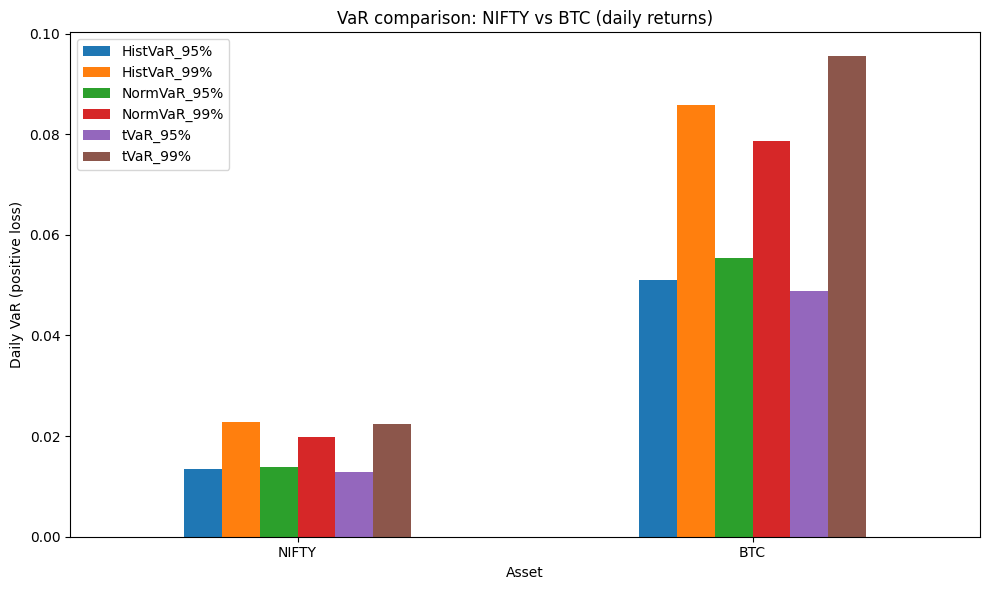


Saved results to var_results.csv


In [8]:
# vaR_yahoo.py
# Requirements:
# pip install yfinance pandas numpy scipy matplotlib

import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# ---------------------------
# Parameters - edit as desired
tickers = {"NIFTY": "^NSEI", "BTC": "BTC-USD"}
start_date = "2022-01-01"   # change to desired start
end_date = None             # None means up to today
alpha_levels = [0.05, 0.01] # 95% and 99% VaR (left tail)
use_log_returns = True      # True -> log returns, False -> simple returns
# ---------------------------

def download_prices(ticker, start=None, end=None):
    df = yf.download(ticker, start=start, end=end, progress=False, auto_adjust=False)
    if df.empty:
        raise RuntimeError(f"No data downloaded for {ticker}.")
    return df['Adj Close']

def compute_returns(price_series, log=True):
    if log:
        return np.log(price_series).diff().dropna()
    else:
        return price_series.pct_change().dropna()

def historical_var(returns, alpha):
    # returns are daily returns (positive = gain). VaR is loss; we'll return positive numbers as losses.
    q = returns.quantile(alpha)
    return -q  # positive number = loss at alpha

def parametric_normal_var(returns, alpha):
    mu = returns.mean()
    sigma = returns.std(ddof=1)
    z = stats.norm.ppf(alpha)  # negative value for left tail
    q = mu + sigma * z
    return -q, mu, sigma

def parametric_t_var(returns, alpha):
    # fit t-distribution to returns: returns ~ t(df, loc, scale)
    # scipy.stats.t.fit returns (df, loc, scale)
    # Use MLE; can be sensitive if returns are very heavy-tailed or dataset is small.
    r = returns.values
    # Provide starting guesses for stability
    try:
        df, loc, scale = stats.t.fit(r, floc=np.mean(r))
    except Exception:
        # fallback: try without fixing loc
        df, loc, scale = stats.t.fit(r)
    q = stats.t.ppf(alpha, df, loc=loc, scale=scale)
    return -q, df, loc, scale

def analyze(ticker_name, price_series):
    returns = compute_returns(price_series, log=use_log_returns)
    out = {"returns": returns}
    for a in alpha_levels:
        out[f"HistVaR_{int((1-a)*100)}"] = historical_var(returns, a)
        out[f"NormVaR_{int((1-a)*100)}"], mu, sigma = parametric_normal_var(returns, a)
        out[f"Norm_mu"] = mu
        out[f"Norm_sigma"] = sigma
        tvar, df, loc, scale = parametric_t_var(returns, a)
        out[f"tVaR_{int((1-a)*100)}"] = tvar
        out[f"t_df"] = df
        out[f"t_loc"] = loc
        out[f"t_scale"] = scale
    return out

# === Pretty print formatted VaR results ===

def print_var_table(df):
    # Round numeric columns for neatness
    df_rounded = df.round({
        "HistVaR_95%": 6,
        "HistVaR_99%": 6,
        "NormVaR_95%": 6,
        "NormVaR_99%": 6,
        "tVaR_95%": 6,
        "tVaR_99%": 6,
        "t_df": 3,
        "Norm_mu": 6,
        "Norm_sigma": 6
    })

    # Print a header
    print("\n=== VaR results (daily returns, losses reported as positive numbers) ===\n")

    # Build formatted table using pandas' pretty string representation
    # Align columns for readability
    formatted = (
        df_rounded
        .rename(columns={
            "HistVaR_95%": "HistVaR 95%",
            "HistVaR_99%": "HistVaR 99%",
            "NormVaR_95%": "NormVaR 95%",
            "NormVaR_99%": "NormVaR 99%",
            "tVaR_95%": "tVaR 95%",
            "tVaR_99%": "tVaR 99%",
            "t_df": "t df",
            "Norm_mu": "Mean (μ)",
            "Norm_sigma": "Std Dev (σ)"
        })
        .to_string(
            index=True,
            justify="center",
            col_space=12
        )
    )

    print(formatted)
    print("\n")  # trailing newline for clean output


# ---------------------------
# Download data
price_data = {}
for name, ticker in tickers.items():
    print(f"Downloading {name} ({ticker}) ...")
    price_data[name] = download_prices(ticker, start=start_date, end=end_date)
    print(f"  {len(price_data[name])} rows downloaded.")

# Align dates: intersect the dates so the comparison uses same date ranges (optional)
common_index = price_data[list(price_data.keys())[0]].index
for s in price_data.values():
    common_index = common_index.intersection(s.index)
for k in price_data:
    price_data[k] = price_data[k].loc[common_index]

# Analyze each series
results = {}
for name, series in price_data.items():
    results[name] = analyze(name, series)
"""
# Build a results DataFrame for the main VaR numbers
rows = []
for name, res in results.items():
    row = {
        "Asset": name,
        "HistVaR_95%": res["HistVaR_95"],
        "HistVaR_99%": res["HistVaR_99"],
        "NormVaR_95%": res["NormVaR_95"],
        "NormVaR_99%": res["NormVaR_99"],
        "tVaR_95%": res["tVaR_95"],
        "tVaR_99%": res["tVaR_99"],
        "t_df": res["t_df"],
        "Norm_mu": res["Norm_mu"],
        "Norm_sigma": res["Norm_sigma"],
    }
    rows.append(row)
df_res = pd.DataFrame(rows).set_index("Asset")
"""
# --- Clean the results so each cell is a scalar float, not a pandas Series ---

clean_rows = []
for name, res in results.items():
    row = {
        "Asset": name,
        "HistVaR_95%": float(res["HistVaR_95"].values[0]) if hasattr(res["HistVaR_95"], 'values') else float(res["HistVaR_95"]),
        "HistVaR_99%": float(res["HistVaR_99"].values[0]) if hasattr(res["HistVaR_99"], 'values') else float(res["HistVaR_99"]),
        "NormVaR_95%": float(res["NormVaR_95%"]) if "NormVaR_95%" in res else float(res["NormVaR_95"]),
        "NormVaR_99%": float(res["NormVaR_99%"]) if "NormVaR_99%" in res else float(res["NormVaR_99"]),
        "tVaR_95%": float(res["tVaR_95"]),
        "tVaR_99%": float(res["tVaR_99"]),
        "t_df": float(res["t_df"]),
        "Mean (μ)": float(res["Norm_mu"]),
        "Std Dev (σ)": float(res["Norm_sigma"]),
    }
    clean_rows.append(row)

df_res = pd.DataFrame(clean_rows).set_index("Asset")

# --- Pretty Print Function ---
def print_var_table(df):
    df_rounded = df.round(6)
    print("\n=== VaR results (daily returns, losses reported as positive numbers) ===\n")
    print(
        df_rounded.to_string(
            index=True,
            justify="center",
            col_space=12
        )
    )
    print("\n")

# --- Print Clean Table ---
print_var_table(df_res)


# Print table
pd.options.display.float_format = "{:.6f}".format
#print("\n=== VaR results (daily returns, losses reported as positive numbers) ===")
#print(df_res)
# Example usage (assuming df_res is your VaR summary DataFrame)
#print_var_table(df_res)

# Plot comparison: show bars for each method and each asset
methods = ["HistVaR_95%", "HistVaR_99%", "NormVaR_95%", "NormVaR_99%", "tVaR_95%", "tVaR_99%"]
plot_df = df_res[methods]

ax = plot_df.plot.bar(rot=0, figsize=(10,6))
ax.set_ylabel("Daily VaR (positive loss)")
ax.set_title("VaR comparison: NIFTY vs BTC (daily returns)")
plt.tight_layout()
plt.show()

# Save results CSV
df_res.to_csv("var_results.csv")
print("\nSaved results to var_results.csv")


## Value-at-Risk (VaR) Analysis — NIFTY vs Bitcoin

### 1. Historical VaR
| Confidence | NIFTY | BTC | Interpretation |
|-------------|-------|-----|----------------|
| 95% | 1.34% | 5.10% | BTC’s 1-day loss can reach ~5× higher than NIFTY’s at the same confidence level. |
| 99% | 2.29% | 8.59% | Extreme downside tail risk is even more pronounced for BTC, reflecting higher volatility. |

**Insight:** BTC exhibits much fatter tails and higher volatility. Historical VaR indicates that on the worst 1% of days, BTC can lose ~8.6%, while NIFTY loses ~2.3%.

---

### 2. Parametric (Normal) VaR
| Confidence | NIFTY | BTC | Comment |
|-------------|-------|-----|---------|
| 95% | 1.38% | 5.53% | Close to historical, but slightly higher for BTC (Normal model slightly overestimates mild tails). |
| 99% | 1.97% | 7.86% | Both increase with confidence, but BTC’s risk remains ~4× higher. |

**Insight:** The Normal VaR aligns roughly with historical for NIFTY (returns nearly normal), but underestimates extreme BTC tails since crypto returns are far from normal.

---

### 3. Parametric (Student-t) VaR
| Confidence | NIFTY | BTC | Degrees of Freedom (df) |
|-------------|-------|-----|--------------------------|
| 95% | 1.30% | 4.89% | NIFTY: 4.49 → moderately heavy tails; BTC: 2.97 → extremely heavy tails. |
| 99% | 2.24% | 9.55% | t-VaR captures fat tails better than Normal, especially for BTC. |

**Insight:**  
- The t-distribution fit shows **df ≈ 3 for BTC**, implying extremely fat tails.  
- BTC’s t-VaR at 99% (≈9.5%) exceeds both Normal and Historical VaR — a warning of higher tail risk.  
- For NIFTY, t-VaR ≈ Historical VaR → market behaves more “normal-like”.

---

### 4. Mean (μ) and Standard Deviation (σ)
| Metric | NIFTY | BTC | Interpretation |
|---------|-------|-----|----------------|
| μ (daily avg return) | 0.039% | 0.085% | BTC’s average daily return is higher but dominated by volatility. |
| σ (daily volatility) | 0.87% | 3.41% | BTC is roughly **4× more volatile**. |

---

### 🧭 **Key Takeaways**
- **BTC’s daily tail losses are 4–5× larger than NIFTY’s**, regardless of method.  
- **Normal VaR underestimates** extreme losses for BTC due to non-Gaussian tails.  
- **Student-t VaR** provides a more realistic risk estimate for BTC, especially at 99%.  
- **NIFTY** behaves closer to Normal, while **BTC** shows clear fat-tail behavior.

---

### 🏁 **Summary Table (Simplified)**
| Metric | NIFTY | BTC | Ratio (BTC/NIFTY) |
|---------|-------|-----|------------------:|
| VaR (95%, Hist) | 1.34% | 5.10% | ~3.8× |
| VaR (99%, Hist) | 2.29% | 8.59% | ~3.8× |
| Std Dev | 0.87% | 3.41% | ~3.9× |

**Conclusion:**  
BTC’s extreme return distribution and heavy tails make its **Value-at-Risk substantially larger** across all metrics, emphasizing the need for tail-robust risk modeling (e.g., t-distribution, EVT) when managing crypto exposure.


# 🧭 Conclusion

The Value-at-Risk analysis reveals that:
- **Bitcoin’s risk exposure** is significantly higher than NIFTY’s across all methods and confidence levels.  
- **Normal VaR** consistently underestimates BTC’s extreme losses due to its thin-tail assumption.  
- **Student-t VaR**, with lower degrees of freedom, better captures heavy-tailed behavior observed in BTC returns.  
- **NIFTY**, being a more stable equity index, displays behavior closer to the Normal distribution, resulting in smaller differences between Historical and Parametric VaR estimates.

Overall, **VaR serves as a valuable but limited risk metric** — it quantifies potential losses up to a threshold but provides no insight into the magnitude of losses **beyond** that threshold (i.e., tail risk).

---

# 🚀 Next Steps

To enhance this analysis:
1. **Compute Conditional VaR (CVaR / Expected Shortfall)** — measures the *average loss* beyond the VaR threshold.  
2. **Test multi-day VaR scaling** (e.g., 10-day VaR using √10 rule) to evaluate medium-term risk.  
3. **Perform backtesting** of VaR predictions versus actual observed losses.  
4. **Incorporate portfolio-level VaR** with correlations between multiple assets.  
5. **Visualize tail distributions** and fit alternative models (e.g., Extreme Value Theory) to capture rare events.

---

*This notebook demonstrates how risk modeling differs across asset classes and assumptions — a crucial insight for traders, risk managers, and researchers working with both traditional and digital assets.*
